
1 — What is Deep Learning? Evolution and how it differs from traditional ML

Ans: Deep Learning (DL) is a subset of machine learning that uses artificial neural networks with many layers to learn hierarchical representations of data. DL models automatically learn feature representations from raw data and can model highly complex, non-linear relationships.

**How DL differs from traditional ML:**

1. **Feature engineering:**
   - Traditional ML: relies heavily on manual feature engineering (domain expertise).
   - Deep Learning: learns features automatically from raw inputs (e.g., pixels, waveforms, text tokens).

2. **Model complexity & capacity:**
   - Traditional ML: models like logistic regression, SVMs, XGBoost are shallower and lower parameter-count (though ensembles can be large).
   - DL: very large parameter counts, multiple non-linear layers; can approximate very complex functions.

3. **Data requirements:**
   - Traditional ML: often works well with smaller datasets.
   - DL: tends to require much larger datasets to avoid overfitting (though transfer learning/self-supervision reduces this).

4. **Computational needs:**
   - DL: benefits from GPUs/TPUs and distributed training.
   - Traditional ML: often CPU-friendly and faster to train on small data.

5. **Interpretability & determinism:**
   - Traditional ML: some models (linear models, decision trees) are easier to interpret.
   - DL: often considered black-box; interpretability requires additional tools (saliency maps, SHAP, LIME).



2 — Explain the basic architecture and functioning of a Perceptron. What are its limitations?
Ans:

**Architecture (single-layer perceptron):**
- Inputs \( \mathbf{x} = [x_1, x_2, ..., x_n] \) plus a bias term \( b \).
- Weights \( \mathbf{w} = [w_1, w_2, ..., w_n] \).
- Linear combination \( z = \mathbf{w} \cdot \mathbf{x} + b \).
- Activation (step/sign) function \( y = \begin{cases}1 & \text{if } z \ge 0 \\ 0 & \text{otherwise}\end{cases} \).
- Output is a binary class (0 or 1).

**Functioning / learning rule (Rosenblatt):**
- Initialize weights (often small random values).
- For each training example, compute output \( \hat{y} \).
- Update weights if prediction wrong: \( \mathbf{w} \leftarrow \mathbf{w} + \eta (y - \hat{y}) \mathbf{x} \) (where \( \eta \) is learning rate).
- Repeat until convergence or max epochs.

**Limitations:**
1. **Linearly separable problems only:** Perceptron can only learn functions where classes are linearly separable (e.g., cannot learn XOR).
2. **Binary outputs by design:** The original perceptron outputs discrete class membership — not probabilities. (Extensions use logistic activation.)
3. **No hidden layers:** Cannot learn hierarchical/complex non-linear features.
4. **Sensitivity to feature scaling and outliers:** Without normalization, learning can be slow or unstable.
5. **Convergence not guaranteed** if data not linearly separable (algorithm will not converge to a solution).





3 - Describe the purpose of activation function in neural networks. Compare Sigmoid, ReLU, and Tanh functions.

Ans: **Role / purpose of activation functions:**
- Introduce non-linearity so neural networks can learn complex, non-linear mappings.
- Without them (i.e., only linear layers), the whole network collapses to a single linear transformation regardless of depth.
- They also control output range (e.g., probability-like, centered around zero) and gradient flow during training.

**Common activations (compare):**

1. **Sigmoid**
   - Formula: \( \sigma(z) = \frac{1}{1 + e^{-z}} \).
   - Output range: (0, 1).
   - Pros:
     - Historically used for binary outputs and logistic regression.
     - Smooth and differentiable everywhere.
   - Cons:
     - **Saturates** for large |z| → gradients near zero (vanishing gradient problem).
     - Outputs non-zero-centered (positive values only), which can slow optimization.
   - Typical use: final layer for binary classification (paired with binary cross-entropy), but often replaced by `sigmoid with logits` or `softmax` as needed.

2. **Tanh (hyperbolic tangent)**
   - Formula: \( \tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}} \).
   - Output range: (-1, 1).
   - Pros:
     - Zero-centered outputs (helps gradient dynamics).
     - Stronger gradients around zero than sigmoid.
   - Cons:
     - Still **saturates** for large |z| → vanishing gradients on deep nets.
   - Typical use: hidden layers historically (before ReLU became dominant).

3. **ReLU (Rectified Linear Unit)**
   - Formula: \( \text{ReLU}(z) = \max(0, z) \).
   - Output range: [0, ∞).
   - Pros:
     - Simple and computationally cheap.
     - Does not saturate for positive z — helps mitigate vanishing gradients.
     - Promotes sparse activations (many zeros) which can improve efficiency.
   - Cons:
     - **Dying ReLU**: neurons can get stuck outputting zero if weights push them to negative inputs; they stop learning if gradients are zero.
     - Not zero-centered.
   - Variants: Leaky ReLU, Parametric ReLU, ELU, GELU (used in Transformers).




4 - What is the difference between Loss function and Cost function in neural networks? Provide examples.

Ans: **Definitions succinctly:**
- **Loss function:** The error for a single training example (how far the model’s prediction is from the true target). Denoted often as \( \mathcal{L}(y, \hat{y}) \).
- **Cost function:** Aggregate (average or sum) of the loss across the entire training set (or a batch). It’s the function the optimizer minimizes. Often denoted \( J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \mathcal{L}(y^{(i)}, \hat{y}^{(i)}; \theta) \).

**Examples:**
- **Binary cross-entropy (loss for a single sample):**
  \[
  \mathcal{L}(y,\hat{y}) = -[y\log\hat{y} + (1-y)\log(1-\hat{y})]
  \]
  - Cost: average of that over dataset (or batch).
- **Categorical cross-entropy (multiclass):** loss per sample is negative log-probability assigned to true class; cost is dataset average.
- **Mean Squared Error (MSE):**
  \[
  \mathcal{L}(y, \hat{y}) = (y - \hat{y})^2
  \]
  - Cost: \( \frac{1}{m} \sum (y_i - \hat{y}_i)^2 \).
- **Hinge loss (for SVM-like tasks)** — per-sample hinge; cost is sum/average.





5 - What is the role of optimizers in neural networks? Compare Gradient Descent, Adam, and RMSprop.

Ans: **Role of optimizers:**  
Optimizers update model parameters \( \theta \) to minimize the cost function. They determine update direction and step size, using gradients (and sometimes second-order information or adaptive scaling).

**Common optimizers compared:**

1. **(Batch) Gradient Descent (GD)**
   - Update: \( \theta \leftarrow \theta - \eta \nabla_\theta J(\theta) \), where \( J \) is cost over whole dataset.
   - Pros:
     - Conceptually simple; stable descent direction.
   - Cons:
     - Very slow for large datasets (needs full pass over data per update).
     - Can get stuck in local minima or saddle points.
   - Variants: Stochastic Gradient Descent (SGD) uses single samples per update; Mini-batch SGD is the practical standard.

2. **RMSprop**
   - Idea: adapt learning rate per-parameter using a moving average of squared gradients.
   - Update rule (intuitive): maintain \( E[g^2]_t \) = decay * previous + (1-decay) * g_t^2. Then divide gradient by \( \sqrt{E[g^2]_t} + \epsilon \).
   - Pros:
     - Good for non-stationary problems; effective with mini-batches.
     - Automatically scales learning rate to parameters.
   - Cons:
     - Requires tuning of base learning rate and decay; sometimes unstable without care.

3. **Adam (Adaptive Moment Estimation)**
   - Combines ideas from RMSprop (adaptive scaling) and momentum (first moment).
   - Maintains first moment \( m_t \) (mean of gradients) and second moment \( v_t \) (uncentered variance), with bias-correction; updates use \( m_t / (\sqrt{v_t} + \epsilon) \).
   - Pros:
     - Fast convergence in practice, widely used default.
     - Works well out-of-the-box for many problems.
   - Cons:
     - Sometimes converges to worse generalization than SGD with momentum (research shows SGD with proper schedule may give better final results on some tasks).
     - Sensitive to hyperparameters in some setups.





6 — Single-layer perceptron from scratch (NumPy) for logical AND




In [1]:


import numpy as np


X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]], dtype=float)
y = np.array([0, 0, 0, 1], dtype=float)


X_bias = np.hstack([X, np.ones((X.shape[0], 1))])


rng = np.random.RandomState(42)
weights = rng.normal(scale=0.1, size=(X_bias.shape[1],))


lr = 0.1
n_epochs = 20

def step(x):
    return 1.0 if x >= 0 else 0.0


for epoch in range(n_epochs):
    errors = 0
    for xi, target in zip(X_bias, y):
        z = np.dot(weights, xi)
        pred = step(z)
        update = lr * (target - pred)
        if update != 0:
            weights += update * xi
            errors += 1
    print(f"Epoch {epoch+1}/{n_epochs}, errors={errors}")

print("Final weights (w1, w2, bias):", weights)


for xi, target in zip(X_bias, y):
    z = np.dot(weights, xi)
    print(f"Input: {xi[:2]}, z={z:.3f}, pred={step(z)}, target={int(target)}")


Epoch 1/20, errors=3
Epoch 2/20, errors=2
Epoch 3/20, errors=3
Epoch 4/20, errors=2
Epoch 5/20, errors=1
Epoch 6/20, errors=0
Epoch 7/20, errors=0
Epoch 8/20, errors=0
Epoch 9/20, errors=0
Epoch 10/20, errors=0
Epoch 11/20, errors=0
Epoch 12/20, errors=0
Epoch 13/20, errors=0
Epoch 14/20, errors=0
Epoch 15/20, errors=0
Epoch 16/20, errors=0
Epoch 17/20, errors=0
Epoch 18/20, errors=0
Epoch 19/20, errors=0
Epoch 20/20, errors=0
Final weights (w1, w2, bias): [ 0.14967142  0.08617357 -0.23523115]
Input: [0. 0.], z=-0.235, pred=0.0, target=0
Input: [0. 1.], z=-0.149, pred=0.0, target=0
Input: [1. 0.], z=-0.086, pred=0.0, target=0
Input: [1. 1.], z=0.001, pred=1.0, target=1



7 — Visualize Sigmoid, ReLU, and Tanh using Matplotlib




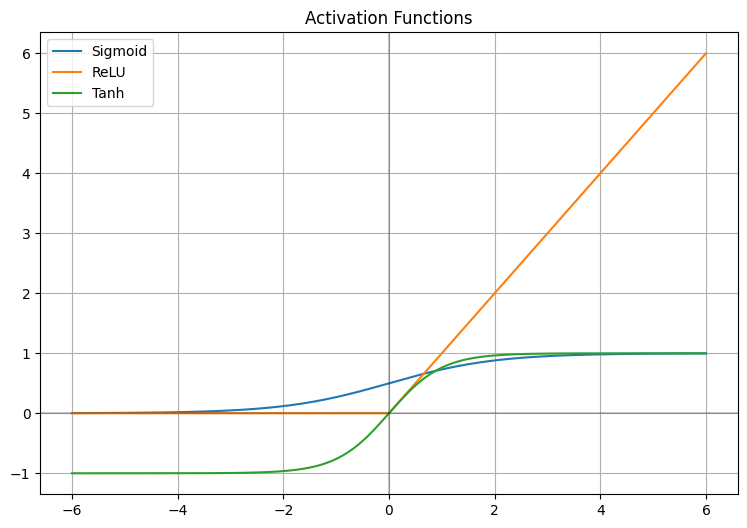

In [2]:

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

x = np.linspace(-6, 6, 400)

plt.figure(figsize=(9, 6))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, tanh(x), label='Tanh')
plt.axhline(0, color='k', linewidth=0.3)
plt.axvline(0, color='k', linewidth=0.3)
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()


 8 — Keras: simple multilayer NN on MNIST, print training accuracy



In [3]:


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape((-1, 28*28)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28*28)).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train_cat,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128)


train_acc = history.history['accuracy'][-1]
print(f"Final training accuracy (last epoch): {train_acc:.4f}")


test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8253 - loss: 0.5990 - val_accuracy: 0.9677 - val_loss: 0.1133
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9556 - loss: 0.1490 - val_accuracy: 0.9748 - val_loss: 0.0882
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9664 - loss: 0.1072 - val_accuracy: 0.9765 - val_loss: 0.0772
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9725 - loss: 0.0887 - val_accuracy: 0.9790 - val_loss: 0.0719
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9776 - loss: 0.0723 - val_accuracy: 0.9805 - val_loss: 0.0646
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9811 - loss: 0.0611 - val_accuracy: 0.9825 - val_loss: 0.0638
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9817 - loss: 0.0553 - val_accuracy: 0.9798 - val_loss: 0.0676
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/s


9 — Visualize loss and accuracy curves for Fashion MNIST and interpret



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7146 - loss: 0.7974 - val_accuracy: 0.8535 - val_loss: 0.3969
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8392 - loss: 0.4464 - val_accuracy: 0.8595 - val_loss: 0.3797
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8523 - loss: 0.4017 - val_accuracy: 0.8630 - val_loss: 0.3640
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8617 - loss: 0.3798 - val_accuracy: 0.8687 - val_loss: 0.3532
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8688 - loss: 0.3554 - val_accuracy: 0.8802 - val_loss: 0.3271
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8740 - loss: 0.3439 - val_accuracy: 0.8773 - val_loss: 0.3363
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━

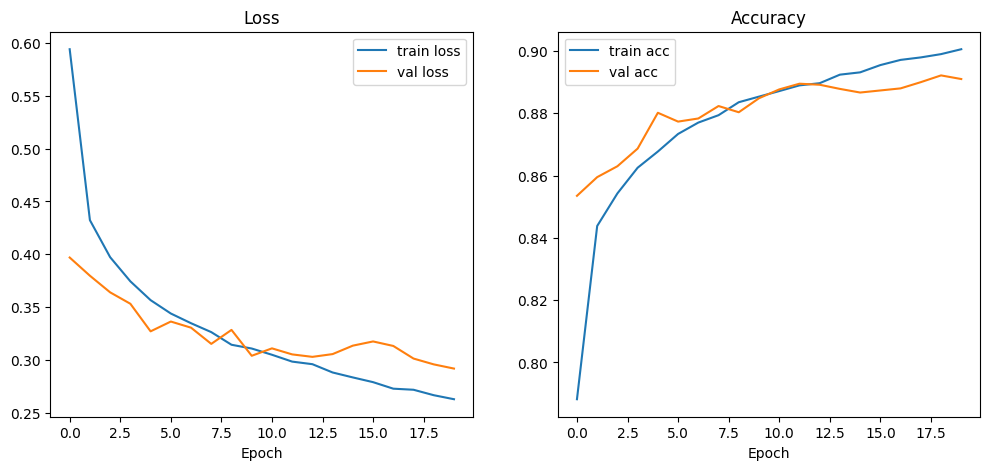

In [4]:


import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape((-1, 28*28)).astype('float32') / 255.0
x_test = x_test.reshape((-1, 28*28)).astype('float32') / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=20, batch_size=128, validation_split=0.1)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()



10 — Fraud detection: real-time data science workflow (design, activations, loss, training, handling imbalance, optimizer, preventing overfitting)

Below is a detailed, end-to-end approach tailored for a bank's fraud detection system with large, imbalanced structured data.

1) **Problem framing & pipeline (high-level)**
- **Objective:** Binary classification — predict probability transaction is fraudulent.
- **Constraints:** Real-time scoring (low-latency), highly imbalanced (fraud << legit), regulatory/audit requirements, concept drift over time.
- **Pipeline components:**
  1. **Data ingestion**: real-time events (Kafka / Kinesis) + batch historical store (data lake).
  2. **Feature store**: precomputed features (customer risk scores, aggregates) that can be read at inference time.
  3. **Offline training**: periodic retraining (daily/weekly) with full historic data + recent window for drift.
  4. **Online scoring**: lightweight model serving (REST/gRPC or edge), with feature lookup latency constraints.
  5. **Monitoring & alerting**: drift detection, performance metrics (precision@k, recall, FPR), and human-in-the-loop review.
  6. **Feedback loop**: label pipeline to capture confirmed frauds to retrain model.

2) **Model design (architecture)**
- **Model choice:** For structured tabular data, gradient-boosted trees (XGBoost/LightGBM/CatBoost) are strong; however, a **multilayer neural network** (MLP) can work if you have many engineered features and interactions.
- **Suggested NN architecture (if using NN):**
  - Input layer for numeric features (scaled), one-hot / embedding layers for categorical features (merchant ID, merchant category, device id).
  - Embeddings for high-cardinality categorical features (e.g., merchant ID, customer ID).
  - Feedforward layers: e.g., Dense 256 → BatchNorm → ReLU → Dropout → Dense 128 → ReLU → Dense 1 (sigmoid).
  - Keep model compact to meet latency.

3) **Activation & loss functions**
- **Output activation:** `sigmoid` (single neuron) to produce probability of fraud.
- **Loss function:** `binary_crossentropy` (a.k.a. log loss). If using logits internally, use `BCEWithLogits` variant for numerical stability.
- **Why:** BCE matches probabilistic binary objectives and works with class weighting and sample weighting.

4) **Handling class imbalance (training & evaluation)**
- **Techniques:**
  - **Class weights:** upweight fraudulent examples in loss (`loss = class_weight * BCE`).
  - **Sample-level weighting:** weight historical confirmed frauds higher.
  - **Resampling:** careful oversampling of minority (SMOTE for tabular), or undersample majority; preferred to use weighted loss rather than naive resampling for fraud to preserve data distribution.
  - **Two-stage modeling:** anomaly detection + classifier or use a cascade where a light model filters candidates and a heavy model inspects flagged items.
  - **Use appropriate metrics:** Precision-Recall AUC, Precision@k, Recall at fixed FPR, confusion-matrix and business metrics (loss due to false negatives vs cost of false positives). ROC-AUC can be misleading for highly imbalanced data.
  - **Cross-validation:** use time-based (forward) splits to preserve temporal ordering (no leakage).

5) **Optimizer & hyperparams**
- **Optimizer:** `Adam` is a good default for quick convergence. For best generalization you may experiment with SGD+momentum and learning-rate schedules.
- **Learning rate schedule:** ReduceLROnPlateau or Cosine/Step schedules to stabilize training.
- **Batch size:** tune for compute and stability. Use stratified or weighted sampling so each batch contains a reasonable number of fraud examples.

6) **Prevent overfitting**
- **Regularization:**
  - Dropout between dense layers (e.g., 0.2–0.5).
  - L2 weight decay on dense layers.
  - Early stopping on validation loss or on business metric (e.g., target precision at given recall).
- **Data techniques:**
  - Feature selection / limit over-engineered features.
  - Data augmentation (less common for tabular, but can simulate transactions with controlled perturbations).
- **Model ensembling & calibration:**
  - Ensemble multiple models (GBoost + NN) and use calibration (Platt scaling / isotonic) to get well-calibrated probabilities.
- **Monitoring & continuous learning:**
  - Monitor feature drift and model performance in production; schedule incremental or full retraining when performance drops.

7) **Real-time production considerations**
- **Latency:** Keep model small; precompute features; use embeddings sized appropriately.
- **Explainability:** Provide reasons for flagged transactions (top contributing features) for human reviewers and regulators.
- **Robustness & security:** Protect against data poisoning and adversarial behavior. Rate-limit and monitor for spikes.
- **Audit logs:** Save model decisions, inputs, and explanations for compliance.
